# Household Disposable Income vs. Gross Domestic Product (by Country)


The proposed hypothersis for this notebook is: "Household Disposable Income (HDI) vs. Gross Domestic Product (GDP) (by Country)". To understand the the relationship between the two metrics the mean of each over some amount of time for many countries was found and plotted.

## Dealing with the Raw GDP Data

First, the libraries needed for manipulation and analysis of the required datasets are imported. Next, the raw GDP dataset is saved as "rawGDP_df1".

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

# import dataset for GDP from https://stats.oecd.org/index.aspx?queryid=60703
gdpData1 = "datasets/GDP_growth.csv"

rawGDP_df1 = pd.read_csv(gdpData1)

rawGDP_df1

,LOCATION,Country,TRANSACT,Transaction,MEASURE,Measure,TIME,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,B1_GE,Gross domestic product (expenditure approach),G,Growth rate,1980,1980,PC,Percentage,0,Units,NaN,NaN,3.337768,NaN,NaN
1,AUS,Australia,B1_GE,Gross domestic product (expenditure approach),G,Growth rate,1981,1981,PC,Percentage,0,Units,NaN,NaN,3.328442,NaN,NaN
2,AUS,Australia,B1_GE,Gross domestic product (expenditure approach),G,Growth rate,1982,1982,PC,Percentage,0,Units,NaN,NaN,-2.220470,NaN,NaN
3,AUS,Australia,B1_GE,Gross domestic product (expenditure approach),G,Growth rate,1983,1983,PC,Percentage,0,Units,NaN,NaN,4.581297,NaN,NaN
4,AUS,Australia,B1_GE,Gross domestic product (expenditure approach),G,Growth rate,1984,1984,PC,Percentage,0,Units,NaN,NaN,5.249330,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1853,EU27_2020,European Union – 27 countries (from 01/02/2020),B1_GE,Gross domestic product (expenditure approach),G,Growth rate,2015,2015,PC,Percentage,0,Units,NaN,NaN,2.294902,NaN,NaN
1854,EU27_2020,European Union – 27 countries (from 01/02/2020),B1_GE,Gross domestic product (expenditure approach),G,Growth rate,2016,2016,PC,Percentage,0,Units,NaN,NaN,2.008615,NaN,NaN
1855,EU27_2020,European Union – 27 countries (from 01/02/2020),B1_GE,Gross domestic product (expenditure approach),G,Growth rate,2017,2017,PC,Percentage,0,Units,NaN,NaN,2.805953,NaN,NaN
1856,EU27_2020,European Union – 27 countries (from 01/02/2020),B1_GE,Gross domestic product (expenditure approach),G,Growth rate,2018,2018,PC,Percentage,0,Units,NaN,NaN,2.116222,NaN,NaN


The dataset is then cleaned by removing columns which will not be used.

In [2]:
df1 = rawGDP_df1.copy()
df1 = df1.drop(columns=['Country','TRANSACT','Transaction','MEASURE','Measure','Year','Unit Code','Unit','PowerCode Code','PowerCode','Reference Period Code','Reference Period','Flag Codes','Flags'])
df1

,LOCATION,TIME,Value
0,AUS,1980,3.337768
1,AUS,1981,3.328442
2,AUS,1982,-2.220470
3,AUS,1983,4.581297
4,AUS,1984,5.249330
...,...,...,...
1853,EU27_2020,2015,2.294902
1854,EU27_2020,2016,2.008615
1855,EU27_2020,2017,2.805953
1856,EU27_2020,2018,2.116222


## Dealing with Raw HDI Data

Then, the dataset for HDI is then saved as the variable "rawHDI_df1".

In [3]:
# import dataset for HDI from https://data.oecd.org/hha/household-disposable-income.htm
HDIData1 = "datasets/HDI_growth.csv"

# read the data with colums - {'Country', 'Metric, 'Subject', 'Measure', 'Frequency', 'Year', 'Value', 'Flag'}
rawHDI_df1 = pd.read_csv(HDIData1)

rawHDI_df1

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,HHDI,NET,AGRWTH,A,1980,3.614571,NaN
1,AUS,HHDI,NET,AGRWTH,A,1981,4.636849,NaN
2,AUS,HHDI,NET,AGRWTH,A,1982,-0.332057,NaN
3,AUS,HHDI,NET,AGRWTH,A,1983,3.684286,NaN
4,AUS,HHDI,NET,AGRWTH,A,1984,2.354387,NaN
...,...,...,...,...,...,...,...,...
930,LTU,HHDI,NET,AGRWTH,A,2015,3.511823,NaN
931,LTU,HHDI,NET,AGRWTH,A,2016,5.634272,NaN
932,LTU,HHDI,NET,AGRWTH,A,2017,0.681542,NaN
933,LTU,HHDI,NET,AGRWTH,A,2018,3.278614,NaN


The dataset is then cleaned by removing columns which will not be used.

In [4]:
df_HDI1 = rawHDI_df1.copy()
df_HDI1 = df_HDI1.rename(columns={'Value':'HDI Growth Percentage'})
df_HDI1 = df_HDI1.drop(columns= ['INDICATOR','SUBJECT','MEASURE','FREQUENCY','MEASURE','Flag Codes'])
df_HDI1

,LOCATION,TIME,HDI Growth Percentage
0,AUS,1980,3.614571
1,AUS,1981,4.636849
2,AUS,1982,-0.332057
3,AUS,1983,3.684286
4,AUS,1984,2.354387
...,...,...,...
930,LTU,2015,3.511823
931,LTU,2016,5.634272
932,LTU,2017,0.681542
933,LTU,2018,3.278614


## Merging the Cleaned Data

The 3-digit country code data is retrieved in order to display the data more clearly.

In [5]:
# Fetch country code from website.
codes_df = pd.read_html('https://laendercode.net/en/3-letter-list.html')[0]
codes_df

,ISO 3166 ALPHA-3,Country
0,AFG,Afghanistan
1,ALA,Aland Islands
2,ALB,Albania
3,DZA,Algeria
4,ASM,American Samoa
...,...,...
247,WLF,Wallis and Futuna
248,ESH,Western Sahara
249,YEM,Yemen
250,ZMB,Zambia


The datasets are merged and saved as "df1".

In [6]:
df1 = df1.merge(df_HDI1, left_on=['LOCATION', 'TIME'], right_on = ['LOCATION','TIME']) 
df1

,LOCATION,TIME,Value,HDI Growth Percentage
0,AUS,1980,3.337768,3.614571
1,AUS,1981,3.328442,4.636849
2,AUS,1982,-2.220470,-0.332057
3,AUS,1983,4.581297,3.684286
4,AUS,1984,5.249330,2.354387
...,...,...,...,...
892,LTU,2019,4.338862,6.752688
893,CRI,2013,2.494766,2.628008
894,CRI,2014,3.542110,3.264263
895,CRI,2015,3.652081,4.602630


Then, the country codes are merged with the dataset.

In [7]:
merged_df = df1.merge(codes_df, left_on=['LOCATION'], right_on=['ISO 3166 ALPHA-3'])
merged_df

,LOCATION,TIME,Value,HDI Growth Percentage,ISO 3166 ALPHA-3,Country
0,AUS,1980,3.337768,3.614571,AUS,Australia
1,AUS,1981,3.328442,4.636849,AUS,Australia
2,AUS,1982,-2.220470,-0.332057,AUS,Australia
3,AUS,1983,4.581297,3.684286,AUS,Australia
4,AUS,1984,5.249330,2.354387,AUS,Australia
...,...,...,...,...,...,...
892,LTU,2019,4.338862,6.752688,LTU,Lithuania
893,CRI,2013,2.494766,2.628008,CRI,Costa Rica
894,CRI,2014,3.542110,3.264263,CRI,Costa Rica
895,CRI,2015,3.652081,4.602630,CRI,Costa Rica


Next, the merged dataset is cleaned by dropping not needed columns.

In [8]:
merged_df = merged_df.drop(columns=['LOCATION','ISO 3166 ALPHA-3'])
merged_df

,TIME,Value,HDI Growth Percentage,Country
0,1980,3.337768,3.614571,Australia
1,1981,3.328442,4.636849,Australia
2,1982,-2.220470,-0.332057,Australia
3,1983,4.581297,3.684286,Australia
4,1984,5.249330,2.354387,Australia
...,...,...,...,...
892,2019,4.338862,6.752688,Lithuania
893,2013,2.494766,2.628008,Costa Rica
894,2014,3.542110,3.264263,Costa Rica
895,2015,3.652081,4.602630,Costa Rica


## Plotting the Data

Next, the dataset is passed through an algorithm to find the information to plot.

In [9]:
i = 0
prev_country = merged_df.iloc[895,3]
country = merged_df.iloc[0,3]
temp_totalGDP = 0
temp_totalHDI = 0
country_number = 0
final = []
total_final = []
while i < 896:
    country = merged_df.iloc[i,3]
    if country == prev_country:   
        temp_totalGDP = temp_totalGDP + merged_df.iloc[i,1]
        temp_totalHDI = temp_totalHDI + merged_df.iloc[i,2]
        country_number = country_number + 1 
    else:
        if country_number > 0:
            final.append(prev_country)
            final.append(temp_totalGDP/country_number)
            final.append(temp_totalHDI/country_number)
            total_final.append(final)
            final = []
            country_number = 0
            temp_totalGDP = 0
            temp_totalHDI = 0
        else:
            temp_totalGDP = temp_totalGDP + merged_df.iloc[i,1]
            temp_totalHDI = temp_totalHDI + merged_df.iloc[i,2]
            country_number = country_number + 1 
    prev_country = country
    i += 1
total_final

[['Australia', 3.0350595249999994, 3.069308318719519],
 ['Austria', 1.8197067826086957, 1.2903084900604649],
 ['Belgium', 1.8789513043478265, 1.2343426567794449],
 ['Canada', 2.42810516, 2.4514306840313678],
 ['Czech Republic', 2.5531365217391304, 2.31787189498768],
 ['Denmark', 1.6384557391304346, 1.7347962276184539],
 ['Finland', 2.1472417105263153, 2.095287699262935],
 ['France', 1.8079204358974361, 1.7716966028737442],
 ['Germany', 1.4205665652173913, 1.1000715111248884],
 ['Greece', 0.7918147391304347, 0.3046221045993383],
 ['Ireland', 5.649571739130434, 3.7586459135464043],
 ['Poland', 4.010589391304348, 3.223024151737938],
 ['Spain', 2.158353217391304, 1.8671134988055607],
 ['Switzerland', 2.044697695652174, 1.9746949163211118],
 ['United Kingdom', 2.082488347826087, 2.2012238895278435],
 ['Russia', 0.8457968333333333, 0.8398445777269985],
 ['Hungary', 2.7486829565217397, 2.0642031430022887],
 ['South Africa', 2.534541608695652, 2.958394653484976],
 ['Netherlands', 1.95445843478

Then, the dataset is formatted to allow plotting.

In [10]:
final_df = pd.DataFrame(data=total_final, columns = ['Country', 'Mean GDP Growth', 'Mean HDI Growth'])
final_df

,Country,Mean GDP Growth,Mean HDI Growth
0,Australia,3.035060,3.069308
1,Austria,1.819707,1.290308
2,Belgium,1.878951,1.234343
3,Canada,2.428105,2.451431
4,Czech Republic,2.553137,2.317872
5,Denmark,1.638456,1.734796
6,Finland,2.147242,2.095288
7,France,1.807920,1.771697
8,Germany,1.420567,1.100072
9,Greece,0.791815,0.304622


In [11]:
final_df = final_df.sort_values(by = 'Mean GDP Growth', ascending = False)
final_df

,Country,Mean GDP Growth,Mean HDI Growth
28,South Korea,6.413699,5.260172
10,Ireland,5.649572,3.758646
20,Estonia,4.300018,4.132288
33,Lithuania,4.282883,4.402853
32,Latvia,4.108252,4.273111
11,Poland,4.010589,3.223024
24,Slovakia,3.724855,2.919528
23,Luxembourg,3.633239,2.930556
0,Australia,3.035060,3.069308
26,New Zealand,3.018384,3.273742


Finally, the data is plotted.

Text(0, 0.5, 'Growth as a Percentage')

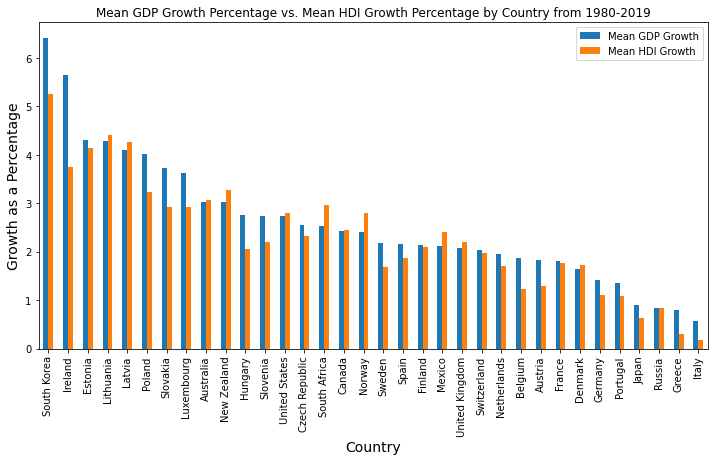

In [12]:
plot = final_df.plot.bar(x = 'Country', rot=0, figsize = (12,6))
plot.tick_params(axis='x', labelrotation = 90)
plot.set_title('Mean GDP Growth Percentage vs. Mean HDI Growth Percentage by Country from 1980-2019')
plot.set_xlabel('Country', fontsize=14)
plot.set_ylabel('Growth as a Percentage', fontsize=14)